# **Data Collection and Framing**

In [ ]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Mount Google Drive Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Healthcare_SCM = pd.read_excel('/content/drive/MyDrive/Linear Regression.xlsx')



In [ ]:
Healthcare_SCM.shape

(6175, 33)

In [ ]:
# Displaying Dataset Columns 
Healthcare_SCM.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit Price', 'Pack Price', 'Unit of Measure (Per Pack)',
       'Line Item Quantity', 'Line Item Value', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

# **Data Preprocessing**

In [ ]:
Work_Data = pd.DataFrame(Healthcare_SCM, columns = ['Fulfill Via','Vendor INCO Term','Shipment Mode',
                                                    'Unit of Measure (Per Pack)','Line Item Quantity','Line Item Value',
                                                    'Pack Price','Unit Price','Weight (Kilograms)','Line Item Insurance (USD)','Freight Cost (USD)'])


In [ ]:
Work_Data.shape
  # Initially we had 33 columns but now we have reduced our columns from 33 to 11 with same number of observations.

(6175, 11)

In [ ]:
Work_Data.head()

,Fulfill Via,Vendor INCO Term,Shipment Mode,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,Direct Drop,EXW,Air,30,19,551.0,29.00,0.97,13,NaN,780.34
1,Direct Drop,EXW,Air,240,1000,6200.0,6.20,0.03,358,NaN,4521.50
2,Direct Drop,FCA,Air,100,500,40000.0,80.00,0.80,171,NaN,1653.78
3,Direct Drop,EXW,Air,60,31920,127360.8,3.99,0.07,1855,NaN,16007.06
4,Direct Drop,EXW,Air,60,38000,121600.0,3.20,0.05,7590,NaN,45450.08


In [ ]:
# Check null values in the dataset
Work_Data.isnull().sum()

Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                 211
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Weight (Kilograms)              0
Line Item Insurance (USD)     183
Freight Cost (USD)              0
dtype: int64

In [ ]:
#Identify and calculate the percentage of the missing values in each attribute
Work_Data.isnull().sum()/Work_Data.count()*100

Fulfill Via                   0.000000
Vendor INCO Term              0.000000
Shipment Mode                 3.537894
Unit of Measure (Per Pack)    0.000000
Line Item Quantity            0.000000
Line Item Value               0.000000
Pack Price                    0.000000
Unit Price                    0.000000
Weight (Kilograms)            0.000000
Line Item Insurance (USD)     3.054072
Freight Cost (USD)            0.000000
dtype: float64

In [ ]:
#dropping_rows_with null values
new_data = Work_Data.dropna()

In [ ]:
# Checking null values again
new_data.isnull().sum()

Fulfill Via                   0
Vendor INCO Term              0
Shipment Mode                 0
Unit of Measure (Per Pack)    0
Line Item Quantity            0
Line Item Value               0
Pack Price                    0
Unit Price                    0
Weight (Kilograms)            0
Line Item Insurance (USD)     0
Freight Cost (USD)            0
dtype: int64

In [ ]:
# New data shape
new_data.shape

(5856, 11)

In [ ]:
new_data.dtypes

Fulfill Via                    object
Vendor INCO Term               object
Shipment Mode                  object
Unit of Measure (Per Pack)      int64
Line Item Quantity              int64
Line Item Value               float64
Pack Price                    float64
Unit Price                    float64
Weight (Kilograms)              int64
Line Item Insurance (USD)     float64
Freight Cost (USD)            float64
dtype: object

In [ ]:
#pd.get_dummies(new_data, columns=["Fulfill Via","Vendor INCO Term","Shipment Mode"]).head()

In [ ]:
replace_map = {'Fulfill Via' : {'Direct Drop':1, 'From RDC':2},
    
              
               
               'Vendor INCO Term' : {'DAP':1, 'DDP':2, 'DDU':3,'EXW':4, 'CIF':5, 'CIP':6, 'FCA' :7, 'N/A - From RDC': 8},   

               'Shipment Mode'  : {'Air':1, 'Air Charter': 2, 'Ocean':3, 'Truck':4}           
               
               
               
               }


In [ ]:

#new_data[["Weight"]] = new_data[["Weight"]].apply(pd.to_numeric) 

In [ ]:
new_data = new_data.replace(replace_map)

In [ ]:
new_data.rename(columns={'Fulfill Via' : 'Fulfill_Via',
 'Vendor INCO Term' : 'Vendor_INCO_Term',
  'Shipment Mode' : 'Shipment_Mode',
  'Unit of Measure (Per Pack)' : 'Unit_of_Measure',
  'Line Item Quantity' : 'Line_Item_Quantity',
  'Line Item Value' : 'Line_Item_Value',
  'Pack Price' : 'Pack_Price', 
  'Unit Price' : 'Unit_Price',
  'Weight (Kilograms)' : 'Weight',
  'Line Item Insurance (USD)' : 'Line_Item_Insurance',
  'Freight Cost (USD)' : 'Freight_Cost' 
}, inplace= True)


In [ ]:
new_data.head()

,Fulfill_Via,Vendor_INCO_Term,Shipment_Mode,Unit_of_Measure,Line_Item_Quantity,Line_Item_Value,Pack_Price,Unit_Price,Weight,Line_Item_Insurance,Freight_Cost
12,1,4,1,100,1000,80000.0,80.00,0.80,341,128.00,2682.47
14,1,4,1,240,1000,1920.0,1.92,0.01,941,3.07,4193.49
15,1,7,1,120,500,41095.0,82.19,0.68,117,65.75,1767.38
16,1,4,1,100,750,53992.5,71.99,0.72,171,86.39,3518.38
17,1,4,1,100,25,8750.0,350.00,3.50,60,14.00,3097.85


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 12 to 6174
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fulfill_Via          5856 non-null   int64  
 1   Vendor_INCO_Term     5856 non-null   int64  
 2   Shipment_Mode        5856 non-null   int64  
 3   Unit_of_Measure      5856 non-null   int64  
 4   Line_Item_Quantity   5856 non-null   int64  
 5   Line_Item_Value      5856 non-null   float64
 6   Pack_Price           5856 non-null   float64
 7   Unit_Price           5856 non-null   float64
 8   Weight               5856 non-null   int64  
 9   Line_Item_Insurance  5856 non-null   float64
 10  Freight_Cost         5856 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 549.0 KB


In [ ]:
round(new_data.describe(),2)

,Fulfill_Via,Vendor_INCO_Term,Shipment_Mode,Unit_of_Measure,Line_Item_Quantity,Line_Item_Value,Pack_Price,Unit_Price,Weight,Line_Item_Insurance,Freight_Cost
count,5856.0,5856.00,5856.00,5856.00,5856.00,5856.00,5856.00,5856.00,5856.00,5856.00,5856.00
mean,1.5,6.15,1.76,75.96,22055.17,196158.96,23.88,0.72,3295.06,297.84,11346.84
std,0.5,2.08,1.21,79.46,43850.47,380148.41,46.55,2.75,7094.98,556.96,16045.08
min,1.0,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.75
25%,1.0,4.00,1.00,30.00,1000.00,10370.17,4.30,0.09,216.75,15.78,2205.15
50%,2.0,8.00,1.00,60.00,4997.50,59955.70,9.36,0.16,1098.00,90.56,6037.08
75%,2.0,8.00,2.00,100.00,23040.00,227078.07,27.00,0.66,3397.50,337.02,14629.42
max,2.0,8.00,4.00,1000.00,619999.00,5951990.40,1250.00,30.00,154780.00,7708.44,289653.20


# **EDA**

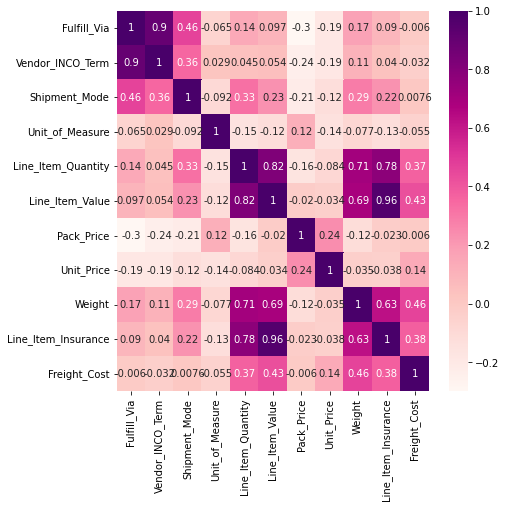

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(new_data.corr(), annot = True, cmap = 'RdPu')

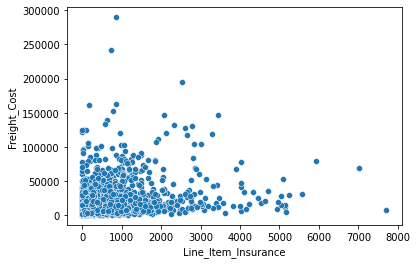

In [ ]:
sns.scatterplot(x="Line_Item_Insurance",
                    y="Freight_Cost",
                    data=new_data)

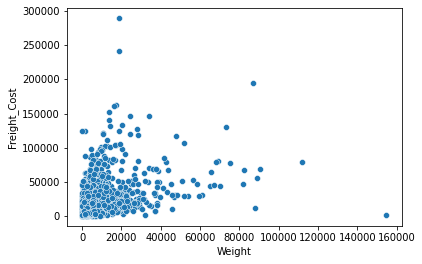

In [ ]:
sns.scatterplot(x="Weight",
                    y="Freight_Cost",
                    data=new_data)

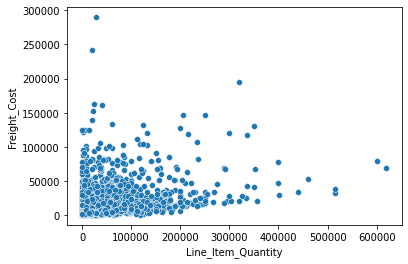

In [ ]:
sns.scatterplot(x="Line_Item_Quantity",
                    y="Freight_Cost",
                    data=new_data)

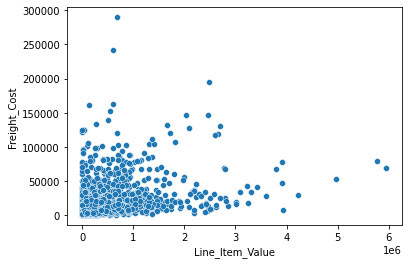

In [ ]:
sns.scatterplot(x="Line_Item_Value",
                    y="Freight_Cost",
                    data=new_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


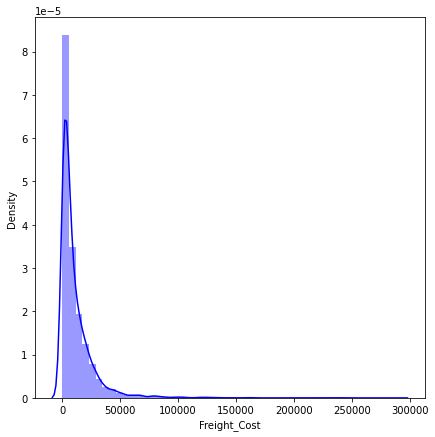

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(new_data['Freight_Cost'], color = 'blue')
plt.show()

# **Model Development**

In [ ]:
X = new_data[['Fulfill_Via',
 'Vendor_INCO_Term',
 'Shipment_Mode',
 'Unit_of_Measure',
 'Line_Item_Quantity',
 'Line_Item_Value',
  'Pack_Price',
 'Unit_Price',
 'Weight',
 'Line_Item_Insurance',
 ]]

In [ ]:
y = new_data['Freight_Cost']



In [ ]:
X = new_data[[
 'Line_Item_Quantity',
 'Line_Item_Value',
 'Weight',
 'Line_Item_Insurance',
 ]]

In [ ]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaled = scaler.fit_transform(X)
print(scaled)
scaled.shape


[[0.00000000e+00 4.28571429e-01 0.00000000e+00 ... 2.66666667e-02
  2.20312702e-03 1.66051756e-02]
 [0.00000000e+00 4.28571429e-01 0.00000000e+00 ... 3.33333333e-04
  6.07959685e-03 3.98264759e-04]
 [0.00000000e+00 8.57142857e-01 0.00000000e+00 ... 2.26666667e-02
  7.55911616e-04 8.52961170e-03]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.00000000e-03
  1.45561442e-02 9.89434957e-03]
 [1.00000000e+00 1.00000000e+00 3.33333333e-01 ... 5.33333333e-03
  9.81909807e-02 1.74007970e-01]
 [1.00000000e+00 1.00000000e+00 3.33333333e-01 ... 3.66666667e-03
  9.99483137e-03 1.49329825e-02]]


(5856, 10)

In [ ]:

# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [ ]:
# Non Linear Regression
from sklearn.linear_model import LinearRegression


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)
metrics.r2_score(y_test, y_pred)
metrics.mean_squared_error(y_test,y_pred)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))


15286.257798390096

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

7642.946094773666

In [ ]:
metrics.r2_score(y_test, y_pred)

0.15360177996368007

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

233669677.478842

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

15286.257798390096

Text(0, 0.5, 'y_pred')

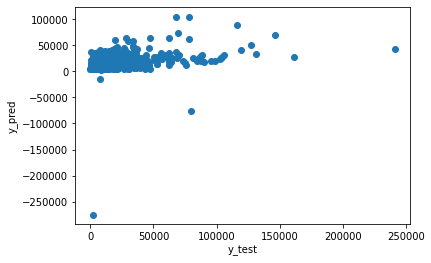

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)

poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y, test_size = 0.3, random_state = 4)

regression = linear_model.LinearRegression()

model = regression.fit(poly_var_train, res_train)
score = model.score(poly_var_test, res_test)

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
ridge_model = Ridge(alpha=0.05, normalize=True)
ridge_model.fit(X_train,y_train)
ridge_pred = ridge_model.predict(X_test)
#Lasso Regression
lasso_model = Lasso(alpha=0.3, normalize=True)
lasso_model.fit(X_train,y_train)
lasso_pred = lasso_model.predict(X_test)
#ElasticNet Regression
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
elastic_model.fit(X_train,y_train)
elastic_pred = elastic_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

In [ ]:
print('Ridge R-square :', metrics.r2_score(y_test, ridge_pred))
print('Lass R-squared :',metrics.r2_score(y_test, lasso_pred))
print('Elastic R-squared :',metrics.r2_score(y_test, elastic_pred))

Ridge R-square : 0.2152748499898629
Lass R-squared : 0.21786970248128268
Elastic R-squared : 0.21893089404608734


#TESTING

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

7330.215801967537


In [ ]:
lm.coef_

array([-0.03827901,  0.01800344,  0.89357295, -5.53556945])

In [ ]:
X_train.columns 

Index(['Line_Item_Quantity', 'Line_Item_Value', 'Weight',
       'Line_Item_Insurance'],
      dtype='object')

In [ ]:
cdf = pd.DataFrame(lm.coef_ , X.columns, columns=['Coeff'])

ValueError: ignored

# **Prediction**

In [ ]:
predictions = lm.predict(X_test)
predictions

array([11883.63713336, 16071.73807744,  8075.62188697, ...,
        9704.28497283,  7330.79526531,  7377.28682041])

In [ ]:
y_test

3968    30046.84
4530    95269.39
1213     3629.37
36        645.10
1036     1934.31
          ...   
3697     6879.32
2699     2220.86
1831     3273.14
4155      491.43
4904      742.98
Name: Freight_Cost, Length: 1757, dtype: float64

Text(0, 0.5, 'predictions')

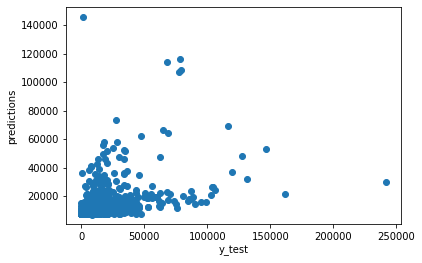

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')


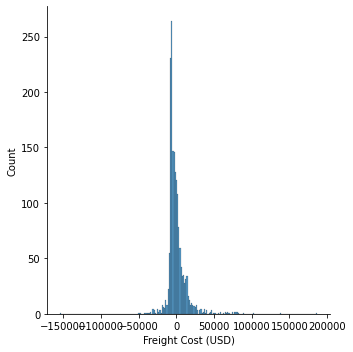

In [ ]:
sns.displot(y_test-predictions)

# **Model Evaluation**

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test,predictions)

8086.797564213969

In [ ]:
metrics.mean_squared_error(y_test,predictions)

206281920.7571547

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

14362.517911465062

In [ ]:
metrics.r2_score(y_test, predictions)

0.25280570231309507

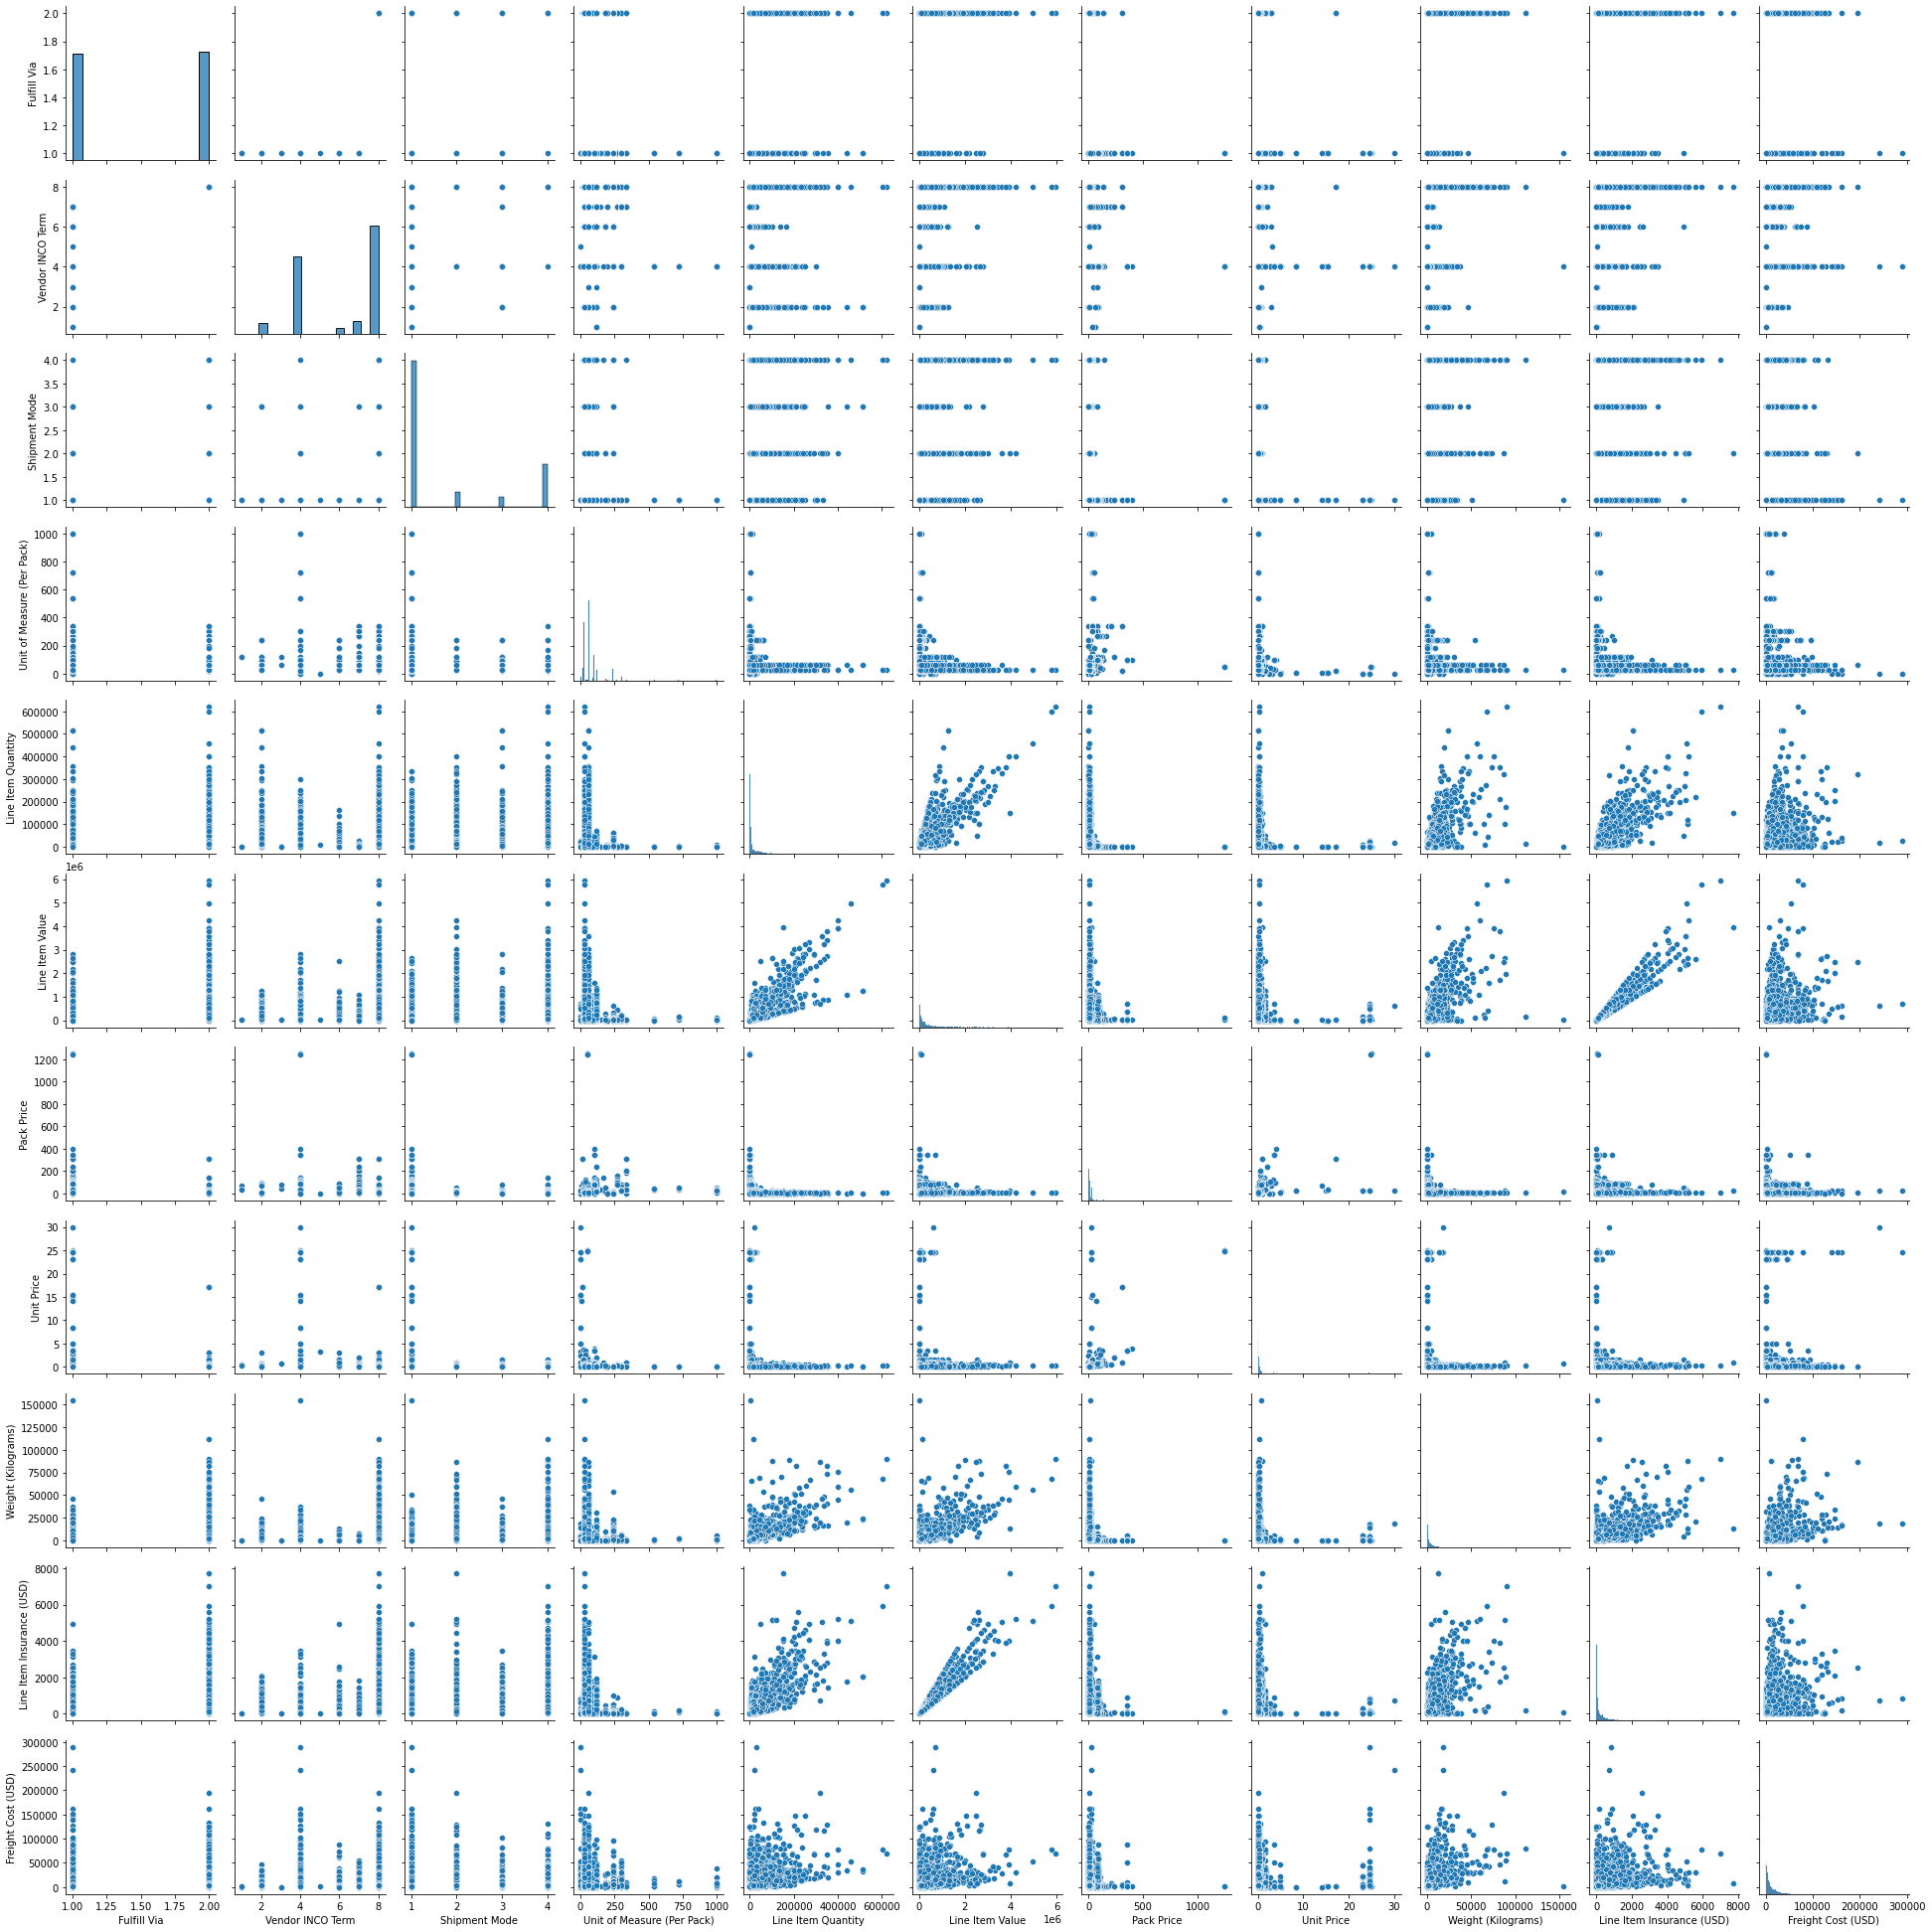

In [ ]:
sns.pairplot(new_data)

In [ ]:
final_data = pd.DataFrame(new_data, columns = ['Line Item Quantity',
                                               'Line Item Value',
                                        
                                                'Weight (Kilograms)',
                                               'Line Item Insurance (USD)',
                                               'Freight Cost (USD)'
                                               ])


In [ ]:
final_data.head()

,Line Item Quantity,Line Item Value,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
12,1000,80000.0,341,128.00,2682.47
14,1000,1920.0,941,3.07,4193.49
15,500,41095.0,117,65.75,1767.38
16,750,53992.5,171,86.39,3518.38
17,25,8750.0,60,14.00,3097.85


In [ ]:
Z =  final_data[[
                 
               'Line Item Quantity',
                  'Line Item Value',
                  'Weight (Kilograms)',
                  'Line Item Insurance (USD)'
                ]]

In [ ]:
#Scaling 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]
vif['variable'] = Z.columns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
vif

,VIF,variable
0,4.274599,Line Item Quantity
1,21.662180,Line Item Value
2,2.691877,Weight (Kilograms)
3,17.218161,Line Item Insurance (USD)


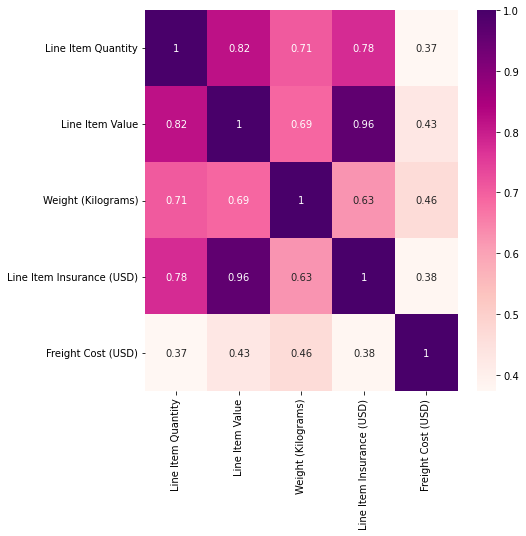

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(final_data.corr(), annot = True, cmap = 'RdPu')

In [ ]:
Z = final_data[[
 'Line Item Quantity',
 'Weight (Kilograms)',
 'Line Item Value'

 ]]

In [ ]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]
vif['variable'] = Z.columns

vif

,VIF,variable
0,4.272522,Line Item Quantity
1,2.613800,Weight (Kilograms)
2,4.074576,Line Item Value


In [ ]:
final = pd.DataFrame(final_data, columns = [    'Line Item Quantity',
                                                'Line Item Value',
                                                'Weight (Kilograms)',
                                                'Freight Cost (USD)'
                                           ])
final.head()

,Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD)
12,1000,80000.0,341,2682.47
14,1000,1920.0,941,4193.49
15,500,41095.0,117,1767.38
16,750,53992.5,171,3518.38
17,25,8750.0,60,3097.85


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Z,y,test_size=0.30, random_state=42)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

7187.2141381988195


In [ ]:
lm.coef_

array([-0.04088016,  0.93080544,  0.0100187 ])

In [ ]:
X_train.columns 

Index(['Line Item Quantity', 'Weight (Kilograms)', 'Line Item Value'], dtype='object')

In [ ]:
cdf = pd.DataFrame(lm.coef_ , X.columns, columns=['Coeff'])

In [ ]:
predictions = lm.predict(X_test)
predictions

array([11319.96232552, 16279.52427542,  8125.73651759, ...,
        9275.6770002 ,  7187.79421162,  7234.45480134])

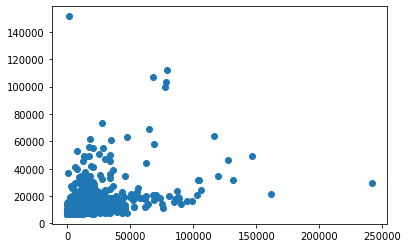

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
metrics.mean_absolute_error(y_test,predictions)

8349.612437657244

In [ ]:
metrics.mean_squared_error(y_test,predictions)

218882655.97699082

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

14794.683368595315

In [ ]:
metrics.r2_score(y_test, predictions)

0.2071633238226982